# DSCI 100 Group 10: Project Report

## Group Members:
- Mohammed Samiul ISLAM SAMI, 58031451
- Narjis Alhusseini, 66272287
- Yangyi Zhu, 67642025
- Norman Wu, 24434375

# Classification of Diabetic Patients using the Concentration of Glucose, Insulin, Blood Pressure, and BMI Measurements as Predictors.

## Introduction

Diabetes Mellitus is a medical condition that impacts the way the body processes glucose, the main form of sugar which provides energy to the body. It is influenced by factors such as obesity and unhealthy diets characterized by excessive sugar intake and involves reduced insulin levels which hinder glucose absorption into cells and lead to elevated blood glucose levels, marking the onset of diabetes (CDC, 2023).

Our analysis, utilizing a Kaggle-derived dataset sourced from the National Institute of Diabetes and Digestive and Kidney Diseases, aims to determine whether a diabetic diagnosis can be determined from multiple medical and kinesiological measurements. The dataset focuses on female patients aged 21 or older from the Pima Indian heritage. The following columns are included:

- Pregnancies (the number of pregnancies the patient had)
    - **pregnancies**
- Glucose (Plasma glucose concentration, a 2 hour oral glucose tolerance test. $mg/dL$)
    - **glucose**
- Blood Pressure (Diastolic blood pressure in $mm\,Hg$)
    - **blood_pressure**
- Skin Thickness (Triceps skin fold thickness in $mm$)
    - **skin_thickness**
- Insulin (2 Hour serum insulin in $\mu U/mL$)
    - **insulin**
- BMI (Body Mass Index in $kg/m^2$)
    - **bmi**
- Diabetes pedigree function (uncommon genetic measure of the likelihood that a patient will have diabetes based on family history)
    - **dpf**
- Age (years)
    - **age**
- Outcome (a value indicating whether or not the patient is diabetic)
    - **outcome**

Ultimately, the analysis will work towards answering the classification question: can glucose concentration, insulin levels, blood pressure, and BMI measurements determine whether an individual has diabetes? This inquiry will also investigate whether the dataset, which includes diagnosed diabetes cases, can be leveraged to diagnose whether a new, unclassified set of patient observations can be classified into the diabetic or non-diabetic class.

The four predictor variables named were chosen based on their clinical significance in diabetes diagnosis. The Mayo Clinic discusses the relationship between diabetes, insulin, and hyperglycemia: the condition which defines high levels of blood glucose (Mayo Clinic Staff, 2022).

Insulin, a hormone produced by the pancreas, regulates glucose levels in the bloodstream by facilitating its absorption and storage in tissue (Mayo Clinic Staff, 2022).

Research reveals that glucose levels below 99 mg/dL are normal, 100-125 mg/dL are pre-diabetic, and levels of 126 mg/dL or higher indicate diabetes (Mayo Clinic Staff, 2022). In order to achieve such high hyperglycemic levels, there must be a lack of insulin production in the body therefore high glucose values with low insulin values are hypothesized to classify patients as diabetic in our data model.

Additionally, Hopkins Medicine states that high blood pressure is twice as likely in individuals with diabetes (Hopkins Medicine, 2023). Our dataset includes diastolic blood pressure measurements, and we hypothesize a strong correlation between diabetic classification and pressures of 90 mm Hg or higher as per the characterization of high diastolic blood pressure used in standard patient analysis (Hopkins Medicine, 2023).

Finally, excessive sugar intake is correlated with unhealthy dietary habits leading to obesity. Klein et al. explain that obesity leads to the impaired function of beta cells: the cells which secrete insulin into the bloodstream during digestion (2022). Body Mass Index (BMI) is a kinesiological body composition measure used to determine obesity as a function of height and weight. Since our dataset is comprised of women, we hypothesize that a BMI of 30 or above will be correlated to a diabetic classification as defined by the women’s BMI classification scale (Diabetes Canada, 2023).

Due to this research-based correlation between predictor variables, we can ultimately hypothesize that hyperglycemia leading to obesity will lower the insulin levels and cause diabetes which will therefore result in high blood pressure. 

In order to decide whether these predictor variables will provide consistent results between the clinical research and our dataset, an exploratory data analysis will be performed to collect the correlational metrics between each predictor and the outcome. 

# References 

Centers for Disease Control and Prevention [CDC]. (2023). What is Diabetes? cdc.gov. https://www.cdc.gov/diabetes/basics/diabetes.htmlOur

Mayo Clinic Staff. Hyperglycemia and diabetes. (August 2022). mayoclinic.org. https://www.mayoclinic.org/diseases-conditions/hyperglycemia/symptoms-causes/syc-20373631

Hopkins Medicine. Diabetes and High Blood Pressure. (2023) The Johns Hopkins University. https://www.hopkinsmedicine.org/health/conditions-and-diseases/diabetes/diabetes-and-high-blood-pressure

Klein S, Gastaldelli A, Yki-Järvinen H, Scherer PE (January 2022). Why does obesity cause diabetes? Cell Metabolism. 34(1):11-20. https://www.cell.com/cell-metabolism/fulltext/S1550-4131(21)00631-8?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS1550413121006318%3Fshowall%3Dtrue

Diabetes Canada. Body Mass Index (BMI) Calculator. (December 2023). Diabetes.ca. https://www.diabetes.ca/resources/tools---resources/body-mass-index-(bmi)-calculator


# **TO DO LIST FOR METHODS** (All) (800 words)
## - Load the data from the web (pref from the original source, github if not) (Sami)
## - Tidy, clean and wrangle the data (Sami)
## - Summary of the data for exploratory reasons (Norman)
## - Figures of the data for exploratory reasons (Norman)
## - Data analysis (throughout, have plots) (Jackie)
#### - Splitting the data into training and testing
#### - Creating the kknn algorithm using the training dataset (using k-folds as well)
#### - Testing the algorithm using the testing set
#### - A analysis of accuracy (metrics)
## - A final summary plot (Sami)

In [1]:
install.packages("kknn")
library(repr)
library(tidyverse)
library(tidymodels)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks strin

In [2]:
#!!!This will have an issue if there is no data folder, fix later.

download.file("https://raw.githubusercontent.com/narjisaa/dsci-100-2023w1-group-10/main/data/diabetes.csv", "data/diabetes.csv")
diabetes_data <- read_csv("data/diabetes.csv")

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# Cleaned column names
colnames(diabetes_data) <- c("pregnancies", "glucose", "blood_pressure", "skin_thickness", "insulin", "bmi", "dpf", "age", "outcome")
head(diabetes_data)

# Casted outcame into chr to change names
class(diabetes_data$outcome) = "chr"
head(diabetes_data)

pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,dpf,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,dpf,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [4]:
# Replace all 0 with NA
diabetes_data$glucose[diabetes_data$glucose == 0] <- NA
diabetes_data$skin_thickness[diabetes_data$skin_thickness == 0] <- NA
diabetes_data$insulin[diabetes_data$insulin == 0] <- NA
diabetes_data$bmi[diabetes_data$bmi == 0] <- NA
diabetes_data$dpf[diabetes_data$dpf == 0] <- NA
diabetes_data$age[diabetes_data$age == 0] <- NA

# Change all 0 to non-diabetic and all 1 to diabetic
diabetes_data$outcome[diabetes_data$outcome == 0] <- "non-diabetic"
diabetes_data$outcome[diabetes_data$outcome == 1] <- "diabetic"

# Casting outcome into factor
DIABETES_DATA <- diabetes_data |>
                 mutate(outcome = as.factor(outcome))

head(DIABETES_DATA) #~~~THIS IS THE MAIN DATASET TO BE USED, DO NOT REASSIGN.

pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,dpf,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,NA,33.6,0.627,50,diabetic
1,85,66,29,NA,26.6,0.351,31,non-diabetic
8,183,64,NA,NA,23.3,0.672,32,diabetic
1,89,66,23,94,28.1,0.167,21,non-diabetic
0,137,40,35,168,43.1,2.288,33,diabetic
5,116,74,NA,NA,25.6,0.201,30,non-diabetic


# **TO DO LIST FOR DISCUSSION** (???) (700 words)
## - Summary
## - Expectations (hypothesis), impact of the finding (application to irl) and future question


# **THINGS TO KEEP IN MIND**
#### - Use set.seed()
#### - Lack of explanation for the predictor variables
#### - Visuals do not have titles or labels
#### - All figures and tables should have table/figure number and legend (when applicable)
#### - Our reasoning is off, we need to improve our reasoning

In [5]:
#get rid of NA data
DIABETES_DATA <- na.omit(DIABETES_DATA)

In [106]:
set.seed(1213)
#spliting the DIABETES_DATA
diabetes_split<-initial_split(DIABETES_DATA, prop = 0.80, strata = outcome)
diabetes_test<-testing(diabetes_split)
diabetes_train<-training(diabetes_split) 
#if the code isn't working because NA value, use the code below
#filter(!is.na(insulin))  

In [107]:
#scale and center the data
diabetes_recipe<-recipe(outcome ~ glucose+bmi+blood_pressure+insulin, data = diabetes_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

In [120]:
nrow(diabetes_test)
nrow(diabetes_train)

[1] 79

[1] 313

In [117]:
#V-folds(5 times)
diabetes_vfold <- vfold_cv(diabetes_train, v =15, strata = outcome)
#K_vals(try neighbors from 1 to 20)
k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))
#knn_spec_tune to decide which K value we should use
knn_spec_tune <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")
#workflow to find the K values
knn_results <- workflow() |>
                 add_recipe(diabetes_recipe) |>
                 add_model(knn_spec_tune) |>
                 tune_grid(resamples = diabetes_vfold, grid = k_vals)|>
                 collect_metrics()
accuracies <- knn_results |>
  filter(.metric == "accuracy")

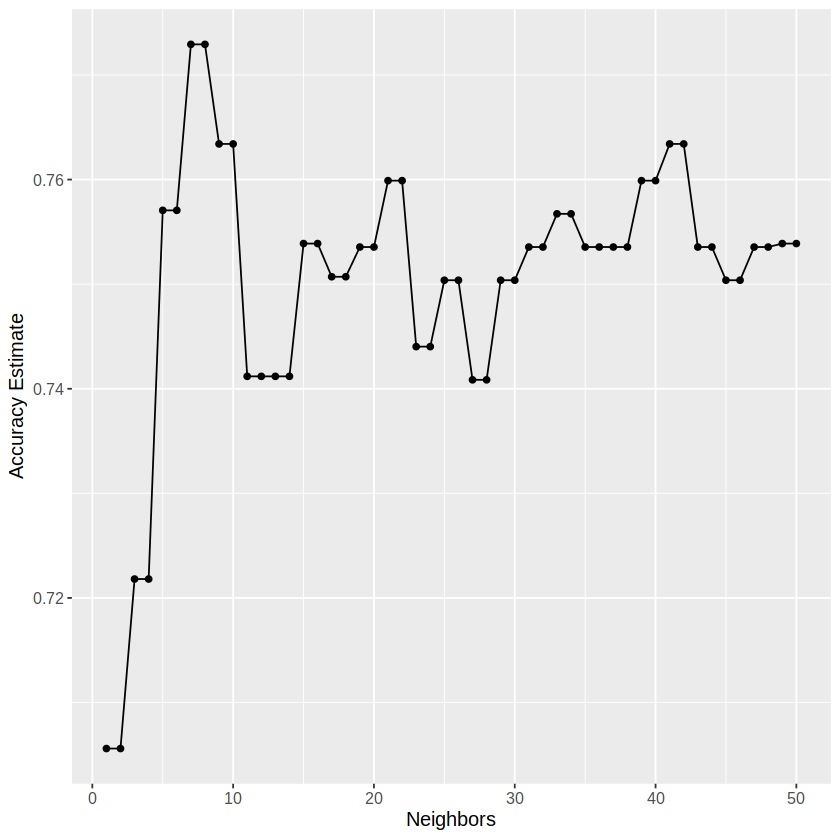

In [118]:
#select K values
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))
accuracy_vs_k

In [121]:
#Knn_ spec with the found K value(stil deciding)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 8) |>
            set_engine("kknn") |>
            set_mode("classification")
#fit the recipe and knn_spec
knn_fit<-workflow() |>
             add_recipe(diabetes_recipe) |>
             add_model(knn_spec) |>
             fit(data = diabetes_train)
#predict
diabetes_test_predictions <- predict(knn_fit, diabetes_test) |>
                          bind_cols(diabetes_test)
diabetes_test_predictions
#accuracy
diabetes_prediction_accuracy <- diabetes_test_predictions |>
                        metrics(truth = outcome, estimate = .pred_class)|>
                        filter(.metric == "accuracy")
diabetes_prediction_accuracy

.pred_class,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,dpf,age,outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
non-diabetic,1,89,66,23,94,28.1,0.167,21,non-diabetic
non-diabetic,0,137,40,35,168,43.1,2.288,33,diabetic
diabetic,2,197,70,45,543,30.5,0.158,53,diabetic
non-diabetic,1,97,66,15,140,23.2,0.487,22,non-diabetic
diabetic,3,158,76,36,245,31.6,0.851,28,diabetic
diabetic,8,176,90,34,300,33.7,0.467,58,diabetic
non-diabetic,7,150,66,42,342,34.7,0.718,42,non-diabetic
non-diabetic,0,100,88,60,110,46.8,0.962,31,non-diabetic
non-diabetic,1,95,66,13,38,19.6,0.334,25,non-diabetic


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7594937
